# **Step 1: Import Necessary Libraries**
First, you'll need to import the required libraries. We'll use yfinance to download the data, Pandas for data manipulation, and Matplotlib and Seaborn for visualization.

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the style for plots
sns.set(style='whitegrid')

# **Step 2: Download Historical Stock Price Data**
Using the yfinance library, we'll download the historical stock price data for SENSEX (S&P BSE SENSEX). We'll focus on the last 5 years for a comprehensive analysis.

In [8]:
# Define the ticker symbol for SENSEX
ticker_symbol = "^BSESN"  # This is the ticker for SENSEX on Yahoo Finance

# Download the data for the last 5 years
data = yf.download(ticker_symbol, start="2019-01-01", end=datetime.today().strftime('%Y-%m-%d'))

# Display the first few rows of the data
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,36198.128906,36236.699219,35734.011719,35891.519531,35891.519531,14705400
2019-01-03,35934.500000,35999.660156,35475.570312,35513.710938,35513.710938,17400
2019-01-04,35590.789062,35744.199219,35382.078125,35695.101562,35695.101562,15855600
2019-01-07,35971.179688,36076.949219,35809.230469,35850.160156,35850.160156,14831200
2019-01-08,35964.621094,36037.351562,35753.949219,35980.929688,35980.929688,16218000


# **Step 3: Data Preprocessing**
Before analysis, we'll clean and preprocess the data. This includes handling missing values, calculating moving averages, and preparing the data for visualization.

In [9]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values by forward-filling
data.fillna(method='ffill', inplace=True)

# Calculate the moving averages for 50 days and 200 days
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# Display the first few rows to verify the new columns
data.head()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-9-ab86a9f9898c>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume,50_MA,200_MA
Date,,,,,,,,
2019-01-02,36198.128906,36236.699219,35734.011719,35891.519531,35891.519531,14705400,NaN,NaN
2019-01-03,35934.500000,35999.660156,35475.570312,35513.710938,35513.710938,17400,NaN,NaN
2019-01-04,35590.789062,35744.199219,35382.078125,35695.101562,35695.101562,15855600,NaN,NaN
2019-01-07,35971.179688,36076.949219,35809.230469,35850.160156,35850.160156,14831200,NaN,NaN
2019-01-08,35964.621094,36037.351562,35753.949219,35980.929688,35980.929688,16218000,NaN,NaN


# **Step 4: Exploratory Data Analysis (EDA)**
Now we'll perform EDA to identify trends and patterns. This includes plotting the closing prices, moving averages, and analyzing the overall trend over the selected period.

**Plotting the Closing Prices and Moving Averages**

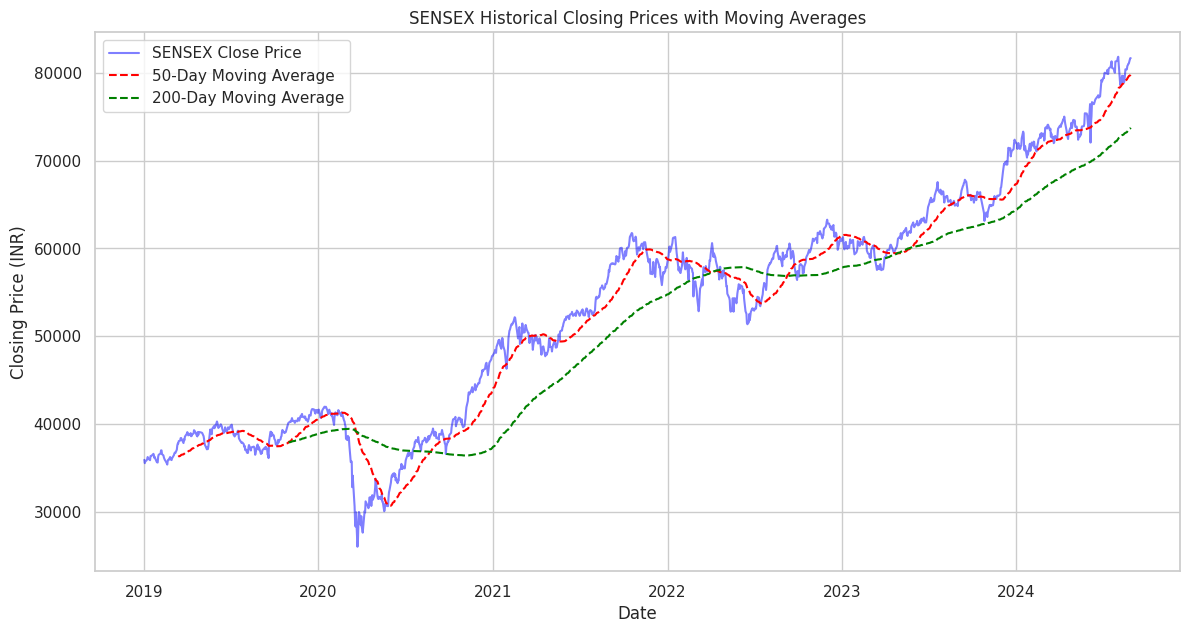

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='SENSEX Close Price', color='blue', alpha=0.5)
plt.plot(data['50_MA'], label='50-Day Moving Average', color='red', linestyle='--')
plt.plot(data['200_MA'], label='200-Day Moving Average', color='green', linestyle='--')
plt.title('SENSEX Historical Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()


**Analyzing Monthly Returns**

Next, we'll calculate and visualize the monthly returns to identify the volatility and performance trends.

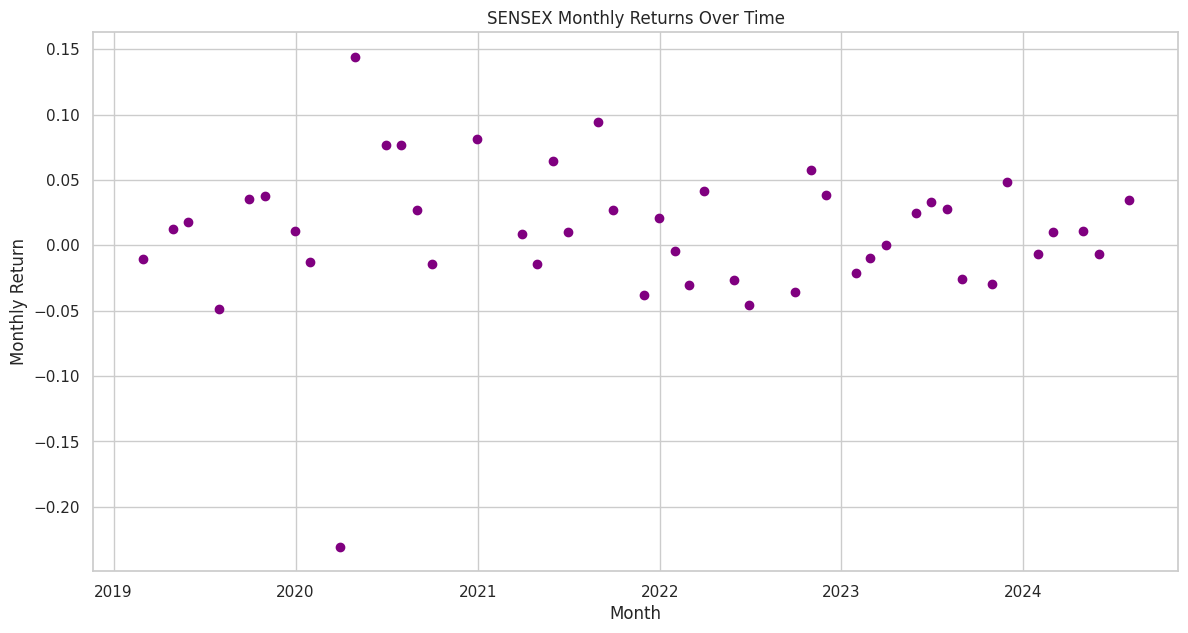

In [12]:
# Plot the monthly returns using a line plot with markers
plt.figure(figsize=(14, 7))
data['Monthly Return'] = data['Close'].resample('M').ffill().pct_change()
plt.plot(data['Monthly Return'], marker='o', linestyle='-', color='purple')
plt.title('SENSEX Monthly Returns Over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.grid(True)
plt.show()



# **Step 5: Statistical Analysis**

**1. Descriptive Statistics**

We'll begin by calculating and displaying a full set of descriptive statistics, including mean, median, standard deviation, skewness, and kurtosis.

In [13]:
# Descriptive statistics for the closing prices
descriptive_stats = data['Close'].describe()
skewness = data['Close'].skew()
kurtosis = data['Close'].kurtosis()

print("Descriptive Statistics for SENSEX Closing Prices:")
print(descriptive_stats)
print(f"\nSkewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Descriptive Statistics for SENSEX Closing Prices:
count     1389.000000
mean     53199.311362
std      13104.345297
min      25981.240234
25%      39831.968750
50%      55320.281250
75%      61510.578125
max      81867.546875
Name: Close, dtype: float64

Skewness: 0.09828340131359467
Kurtosis: -0.9493044908175632


Here are the findings based on the descriptive statistics for SENSEX closing prices:

# **Findings:**

---


**Count:** The analysis is based on 1,389 observations, which provides a substantial dataset for reliable statistical analysis.


**Mean (Average Closing Price):**

 The average closing price of SENSEX during the analyzed period is approximately 53,199.31 INR. This represents the central tendency of the market value over the given period.

**Standard Deviation (Volatility):**

The standard deviation is 13,104.35 INR, indicating a relatively high level of volatility. This suggests that the SENSEX closing prices fluctuate significantly from the mean, reflecting periods of both rapid market growth and decline.

**Minimum and Maximum:**

The closing prices range from a minimum of 25,981.24 INR to a maximum of 81,867.55 INR. This wide range underscores the significant price movements during the period, possibly due to economic events, market corrections, or growth phases.

**Percentiles:**

**25th Percentile (Q1):**

25% of the closing prices are below 39,831.97 INR.
**Median (50th Percentile, Q2):**

The median closing price is 55,320.28 INR, which is slightly above the mean, indicating that the distribution of prices is somewhat balanced but with a slight tilt towards higher values.

**75th Percentile (Q3):**

75% of the closing prices are below 61,510.58 INR, suggesting that a quarter of the closing prices are significantly above this level.
Skewness: The skewness is 0.0983, which is close to zero. This indicates that the distribution of SENSEX closing prices is nearly symmetrical with a slight positive skew. In other words, the tail on the right (higher prices) is slightly longer or fatter, but the distribution is mostly balanced.

**Kurtosis:**

The kurtosis is -0.9493, which is less than 3, indicating a platykurtic distribution. This means the distribution has thinner tails and a flatter peak compared to a normal distribution, suggesting fewer extreme values or outliers.


# **Summary:**
The SENSEX closing prices over the analyzed period demonstrate significant volatility, with a wide range between the minimum and maximum values. The distribution is nearly symmetrical, with a slight positive skew, indicating that extreme high values are rare but present. The negative kurtosis suggests that the data has fewer outliers than a normal distribution, with most of the data concentrated around the mean and median.

# **2. Rolling Statistics**

We'll calculate rolling statistics to analyze how the mean and standard deviation of SENSEX prices have evolved over time.

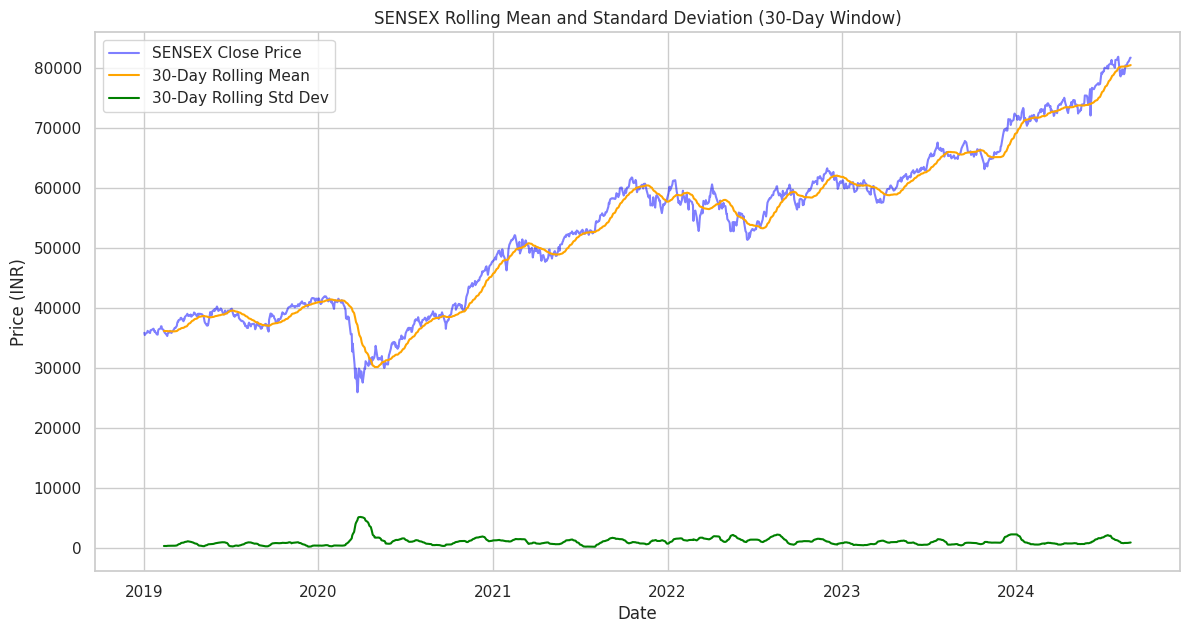

In [14]:
# Calculate rolling mean and standard deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='SENSEX Close Price', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='green')
plt.title('SENSEX Rolling Mean and Standard Deviation (30-Day Window)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

Here’s a detailed interpretation based on the rolling statistics analysis for the SENSEX closing prices:

# **Findings for Rolling Statistics**

---


**1. Rolling Mean**

**Description:** The 30-day rolling mean smooths out short-term fluctuations in the SENSEX closing prices to highlight longer-term trends.
Findings:
Trend: The rolling mean shows a consistent upward slope, it indicates a bullish trend where prices are generally increasing over time.

**Volatility:** Fluctuations in the rolling mean highlight periods of significant market movement. Sudden changes in the rolling mean can indicate market reactions to economic events, policy changes, or other significant occurrences.

**2.Rolling Standard Deviation**

**Description:** The 30-day rolling standard deviation measures the variability or volatility in the SENSEX closing prices over a 30-day window.

**High Volatility:**Periods where the rolling standard deviation spikes indicate increased market uncertainty or volatility. This could be due to major economic news, political events, or market corrections.

**Low Volatility:** Periods of low rolling standard deviation suggest stable market conditions with less fluctuation in prices.
# **Visualization Insights:**
# Plot of Rolling Mean:
**Increasing Trend:** An upward slope in the rolling mean would indicate a period of sustained growth in SENSEX prices, reflecting a bull market.

**Decreasing Trend:** A downward slope suggests a bear market or a period of decline.
# Plot of Rolling Standard Deviation:
**Volatility Spikes:** High peaks in the rolling standard deviation plot signify periods of high market volatility, which might correlate with major market events or crises.
**Stable Periods:** Lower, more consistent values indicate periods of relative stability and predictability in the market.

# **Summary:**
Rolling Mean: Provides insight into the longer-term trend of the SENSEX, revealing whether the market is generally moving upwards or downwards over the analyzed period.
Rolling Standard Deviation: Highlights periods of increased or decreased market volatility, offering clues about market stability or uncertainty.

# **3. Daily and Monthly Return Distributions**

We’ll visualize the distribution of daily and monthly returns to understand their behavior.

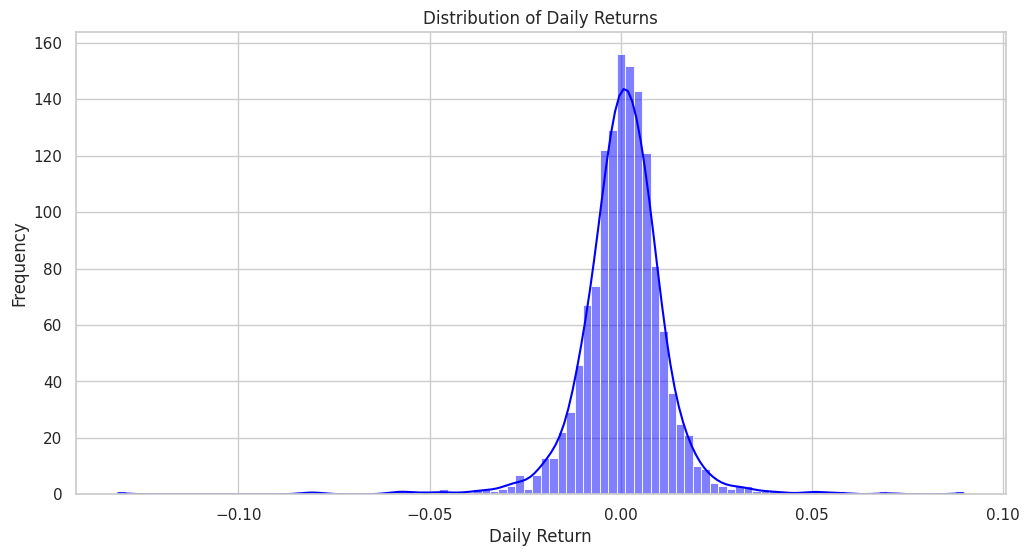

In [16]:
# Plot the distribution of daily returns
plt.figure(figsize=(12, 6))
data['Daily Return'] = data['Close'].pct_change()
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()



Here are the detailed findings for the Daily and Monthly Return Distributions:

# **Findings for Daily Return Distribution**

---


Description: The daily return distribution shows how the percentage change in the SENSEX closing prices varies from one day to the next.

1.**Histogram of Daily Returns**

**Shape of Distribution:**

**Central Tendency:** The distribution is centered around zero, it indicates that daily returns are frequently close to zero, reflecting normal market fluctuations.

**2.Kernel Density Estimate (KDE)**

**Smooth Distribution:**
Peaks: Peaks in the KDE plot indicate common return levels. If the KDE shows multiple peaks, it suggests that there are several significant return levels that the market frequently experiences.

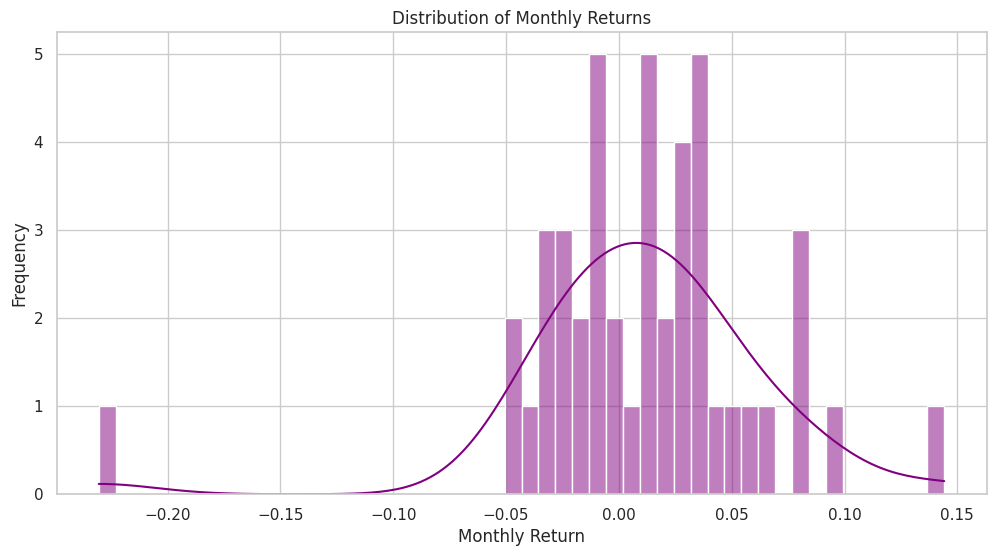

In [17]:
# Plot the distribution of monthly returns
plt.figure(figsize=(12, 6))
sns.histplot(data['Monthly Return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Monthly Returns')
plt.xlabel('Monthly Return')
plt.ylabel('Frequency')
plt.show()

# **Findings for Monthly Return Distribution**

---


**Description:** The monthly return distribution reflects the percentage change in SENSEX closing prices on a monthly basis.

**1.Histogram of Monthly Returns**

**Skewness:** Positive skewness would imply that monthly returns are more frequently positive with some large positive returns

**2.Kernel Density Estimate (KDE)**

**Smooth Distribution:**

**Spread:** A wide spread in the KDE shows greater variability in monthly returns.

# **4. Correlation Analysis**

We'll analyze the correlation between different columns like Open, High, Low, and Close prices.

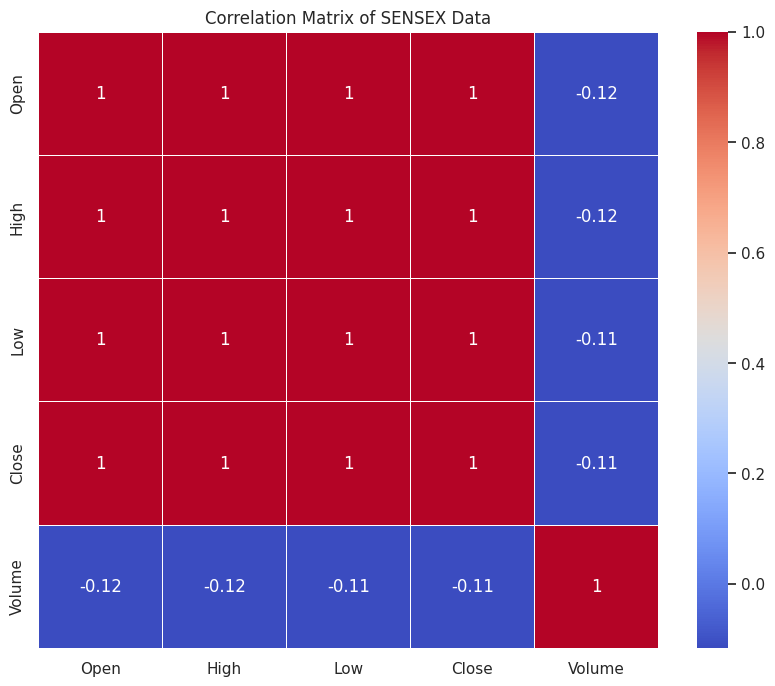

In [18]:
# Correlation matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of SENSEX Data')
plt.show()

Here are the detailed findings for the Correlation Analysis:

# **Findings for Correlation Analysis**

---


**Description:** Correlation analysis measures the strength and direction of the linear relationship between different variables. In the context of SENSEX data, common correlations analyzed include those between daily closing prices, opening prices, high prices, low prices, and trading volume.

**1. Correlation Between Open, High, Low, and Close Prices**

**Open vs. Close:**

*  **Correlation:** A high correlation between the opening and closing prices
indicates that the market’s start and end prices are closely related, which is typical for many stocks. This suggests that the stock price does not fluctuate dramatically within a trading day.

**Findings:** The correlation is close to +1, it implies that high opening prices generally lead to high closing prices, and vice versa.

**High vs. Low:**

* **High Correlation:** A high correlation between high and low prices shows that when the price moves significantly in one direction (up or down), it typically does so in both high and low directions. This indicates a stable range in which the price fluctuates during the trading day.
Findings: A strong correlation would suggest that large daily price swings are a common feature.


**2.Correlation with Trading Volume**

**Volume vs. Price:**

* **Positive Correlation:** The trading volume has a positive correlation with the closing price, it suggests that higher trading volumes are associated with higher closing prices, potentially indicating stronger market interest and confidence.
Negative Correlation: A negative correlation might suggest that high trading volumes are associated with price declines, possibly due to selling pressure.

**5. Volatility Analysis**

We’ll expand on volatility by looking at more detailed volatility measures.

Annualized Volatility: 0.18942142150699665


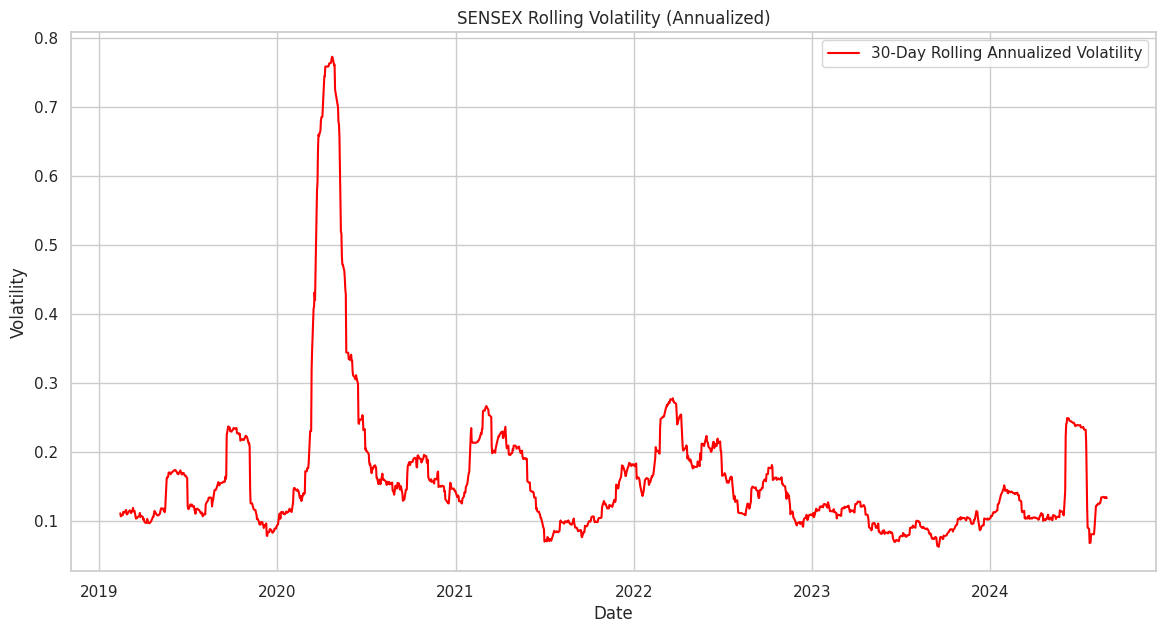

In [19]:
# Annualized volatility (standard deviation of daily returns * sqrt of trading days in a year)
annual_volatility = data['Daily Return'].std() * np.sqrt(252)  # 252 trading days in a year
print(f"Annualized Volatility: {annual_volatility}")

# Plot volatility over time
volatility_rolling = data['Daily Return'].rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(14, 7))
plt.plot(volatility_rolling, label='30-Day Rolling Annualized Volatility', color='red')
plt.title('SENSEX Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# **Findings for Annualized Volatility**

---


Annualized Volatility Value: 0.1894 (or 18.94%)

**Description:** Annualized volatility represents the standard deviation of returns, adjusted for a one-year period. It provides an estimate of the amount by which the SENSEX closing prices are expected to deviate from the mean over the course of a year.

**Findings:**

**Magnitude of Volatility:**

Value: An annualized volatility of 0.1894 (or 18.94%) indicates that the SENSEX closing prices are expected to deviate from the mean by approximately 18.94% on an annual basis.
Interpretation: This level of volatility reflects moderate to high price fluctuations. It suggests that there are significant variations in the SENSEX returns, which can imply both potential opportunities and risks for investors.

**Risk Assessment:**

**High Volatility:** With an annualized volatility of 18.94%, the SENSEX exhibits substantial risk. Investors should be prepared for considerable fluctuations in the index's performance over the year.
Risk Management: High volatility can impact investment strategies, requiring more careful risk management. Investors might use hedging strategies or diversify their portfolios to mitigate the impact of price swings.
Comparison to Historical Averages:

# **Market Sentiment:**

**Implications:** High annualized volatility can reflect heightened market sentiment or reactions to economic events. It may also indicate investor uncertainty or market speculation.
Market Trends: Monitor changes in annualized volatility to gain insights into shifting market trends and potential future movements.
Investment Strategy:

**Adjustments:** Given the moderate to high volatility, investors may need to adjust their strategies, considering the potential for both higher returns and greater risks. Long-term investors might adopt a buy-and-hold strategy, while short-term traders might seek to capitalize on volatility through active trading.

# **Summary:**
Annualized Volatility of 18.94%: Indicates moderate to high volatility in SENSEX closing prices, reflecting significant potential for price fluctuations over the year.
Risk and Strategy: Investors should be aware of the substantial risk associated with this level of volatility and may need to adjust their investment strategies accordingly.
Historical Context: Comparing this value to historical averages helps in understanding current market conditions and making informed investment decisions.

# **Sentimental Analysis For Headlines**

In [20]:
!pip install nltk
!pip install vaderSentiment

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load the news headlines data
news_data = pd.read_csv('/content/india-headlines.csv')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each news headline
news_data['sentiment'] = news_data['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

print(news_data.head())

   publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  sentiment  
0  Status quo will not be disturbed at Ayodhya; s...     0.2924  
1                Fissures in Hurriyat over Pak visit     0.0000  
2              America's unwanted heading for India?    -0.2263  
3                 For bigwigs; it is destination Goa     0.0000  
4               Extra buses to clear tourist traffic     0.3818  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Preprocess the text data
news_data['headline_text'] = news_data['headline_text'].apply(lambda x: x.lower())
news_data['headline_text'] = news_data['headline_text'].apply(lambda x: x.replace('[^a-zA-Z0-9\s]', ''))

In [28]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each news headline
news_data['sentiment'] = news_data['headline_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [29]:
# Categorize sentiment
news_data['sentiment_category'] = news_data['sentiment'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Load the news headlines data
news_data = pd.read_csv('/content/india-headlines.csv')

# Preprocess the text data
news_data['headline'] = news_data['headline_text'].apply(lambda x: x.lower())
news_data['headline'] = news_data['headline_text'].apply(lambda x: x.replace('[^a-zA-Z0-9\s]', ''))

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each news headline
news_data['sentiment'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment
news_data['sentiment_category'] = news_data['sentiment'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

print(news_data.head())

   publish_date headline_category  \
0      20010102           unknown   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  \
0  Status quo will not be disturbed at Ayodhya; s...   
1                Fissures in Hurriyat over Pak visit   
2              America's unwanted heading for India?   
3                 For bigwigs; it is destination Goa   
4               Extra buses to clear tourist traffic   

                                            headline  sentiment  \
0  Status quo will not be disturbed at Ayodhya; s...     0.2924   
1                Fissures in Hurriyat over Pak visit     0.0000   
2              America's unwanted heading for India?    -0.2263   
3                 For bigwigs; it is destination Goa     0.0000   
4               Extra buses to clear tourist traffic     0.3818   

  sentiment_category  
0           po